# 03_EDA_ANALISIS_DESCRIPTIVO.ipynb
# Objetivo: análisis descriptivo inicial del dataset ya limpio y transformado

# Importación de librerias y configuración

In [4]:
# Librerías básicas
import os
from pathlib import Path
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorar advertencias
warnings.filterwarnings("ignore")

# Semilla para reproducibilidad
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print("Librerías cargadas correctamente.")
print("Seaborn versión:", sns.__version__)

# --- Opciones de pandas para mejor visualización ---
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")


Librerías cargadas correctamente.
Seaborn versión: 0.13.2


## Cargo dataset limpio y transformado

In [5]:

# Ruta del archivo CSV limpio y transformado
ruta_dataset = "../DATA/DATA_OUTPUT/dataset_limpio_y_transformado.csv"

# Cargar el dataset
df = pd.read_csv(ruta_dataset, encoding="utf-8")

# Mostrar dimensiones
print(f"Dataset cargado correctamente.")
print(f"Filas: {df.shape[0]:,}  |  Columnas: {df.shape[1]}")

# Vista rápida de las primeras filas
df.head()


Dataset cargado correctamente.
Filas: 10,000  |  Columnas: 34


,transaction_id,customer_id,name,email,phone_clean,dominio,risk_score,risk_level,created_at,customer_days_active,transaction_date,transaction_hour,hour,year,month,day,weekday,month_year,region_normalized,country_normalized,is_international,amount,currency,merchant,merchant_category,entry_mode,transaction_result,arn,card_type,card_bin6,card_last4,card_masked,card_expiry,is_fraud
0,d97ea0b8-1869-4a78-a0cd-6356e6bf5feb,f21d2833-c18e-4d66-9943-97c46f5591ad,Christopher Gilmore,qmercer@gmail.com,866884634513,gmail.com,0.69,Medio,2025-09-05,242,2025-01-06,19:06:08,0,2025,9,5,Friday,2025-09,California,Togo,1,124.96,EUR,Brown-Gilbert,restaurant,wallet,approved,37a7048c3a5045f9b8baf73c,MASTERCARD,423952,6802,XXXX-XXXX-XXXX-6802,03/24,0
1,6c330754-0fdb-4f31-8cf7-7513d4e39f3a,a3b3e11b-7775-426c-a949-7db69b9381ec,William Barrett,elaine44@hotmail.com,100033715734463,hotmail.com,0.27,Bajo,2024-11-03,141,2025-03-24,23:30:54,0,2024,11,3,Sunday,2024-11,Texas,Saint Martin,1,151.69,EUR,"Davis, Erickson and Davis",electronics,magstripe,approved,f512e83aa9eb48d98b66c6ac,AMEX,431620,3027,XXXX-XXXX-XXXX-3027,10/26,0
2,6238ad32-3b74-443c-8278-ace4a2f155a9,9acfe8a8-0a93-4d58-bdc8-c078ef635de6,Linda Williams,woodkaren@hotmail.com,936376652159352,hotmail.com,0.16,Bajo,2025-03-23,158,2024-10-16,07:26:32,0,2025,3,23,Sunday,2025-03,Utah,Jersey,1,160.14,EUR,"Anderson, Barnett and Lloyd",gaming,ecommerce,declined,a6571d209527484da6c0759e,MASTERCARD,477500,7390,XXXX-XXXX-XXXX-7390,02/25,0
3,9e0d4019-f135-4738-8314-b1a046fb899f,45e1ded6-e770-4f42-b196-9c966a6e9e59,Vincent Saunders,nancy83@hotmail.com,2779202543,hotmail.com,0.58,Medio,2025-05-12,132,2024-12-31,08:37:49,0,2025,5,12,Monday,2025-05,New Mexico,British Indian Ocean Territory (Chagos Archipe...,1,77.03,EUR,"Wise, Larson and Brown",restaurant,contactless,declined,ccc1771d83c848038a953797,VISA,468119,6770,XXXX-XXXX-XXXX-6770,01/29,0
4,ec9c235c-b9d1-4ad2-8e5f-7252ffa748e7,2d4cfaec-1127-429e-bdbb-9faa2e33c08b,Mrs. Lindsey Allen Md,browndavid@hotmail.com,17225903259599,hotmail.com,0.55,Medio,2024-10-20,292,2025-08-08,17:59:21,0,2024,10,20,Sunday,2024-10,Kansas,Sao Tome and Principe,1,139.38,EUR,Maldonado-Beck,electronics,chip,approved,b0a54d13ca094472aa652ae7,VISA,469023,9432,XXXX-XXXX-XXXX-9432,02/29,0


### Creo carpeta de salida para el análisis del EDA

In [6]:
# Ruta base (sube un nivel desde la carpeta NOTEBOOKS)
base_dir = Path("..") / "DATA" / "DATA_OUTPUT"

# Crear carpeta para guardar los resultados del análisis
carpeta_eda = base_dir / "EDA"
carpeta_eda.mkdir(parents=True, exist_ok=True)

print(f"Carpeta creada o ya existente: {carpeta_eda.resolve()}")


Carpeta creada o ya existente: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA


## Chequeo básico de estrusctura y nulos

In [7]:
# Chequeo básico del dataset: tamaño, columnas, tipos y nulos

print("Dimensiones -> Filas, Columnas:", df.shape)
print("\nColumnas:\n", df.columns.tolist(), "\n")

print("=== df.info() ===")
df.info()

# Resumen de nulos (solo las columnas que tengan)
nulos = df.isna().sum().sort_values(ascending=False)
nulos = nulos[nulos > 0]

if not nulos.empty:
    resumen_nulos = (
        nulos.to_frame("nulos")
             .assign(pct=lambda t: (t["nulos"] / len(df) * 100).round(2))
    )
    display(resumen_nulos)
    # Guardar en la carpeta de salida del EDA
    (carpeta_eda / "resumen_nulos.csv").write_text(
        resumen_nulos.to_csv(index=True, encoding="utf-8-sig")
        or ""  # write_text requiere una string; usamos el retorno de to_csv
    )
    print("Resumen de nulos guardado en:", (carpeta_eda / "resumen_nulos.csv").resolve())
else:
    print("No hay columnas con nulos.")


Dimensiones -> Filas, Columnas: (10000, 34)

Columnas:
 ['transaction_id', 'customer_id', 'name', 'email', 'phone_clean', 'dominio', 'risk_score', 'risk_level', 'created_at', 'customer_days_active', 'transaction_date', 'transaction_hour', 'hour', 'year', 'month', 'day', 'weekday', 'month_year', 'region_normalized', 'country_normalized', 'is_international', 'amount', 'currency', 'merchant', 'merchant_category', 'entry_mode', 'transaction_result', 'arn', 'card_type', 'card_bin6', 'card_last4', 'card_masked', 'card_expiry', 'is_fraud'] 

=== df.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_id        10000 non-null  object 
 1   customer_id           10000 non-null  object 
 2   name                  10000 non-null  object 
 3   email                 10000 non-null  object 
 4   phone_clean           

## Compruebo registros duplicados

In [8]:
# Paso 4️⃣ - Comprobación de duplicados
duplicados = df.duplicated().sum()
print(f"Número de registros duplicados en el dataset: {duplicados}")

# Si hay duplicados, los mostramos (solo los primeros 5)
if duplicados > 0:
    display(df[df.duplicated()].head())
else:
    print("No hay registros duplicados.")


Número de registros duplicados en el dataset: 0
No hay registros duplicados.


## 1. Estadísticas descriptivas

In [9]:
# Resumen numérico general
resumen_numerico = df.describe().T  # Transpuesto para que se vea mejor
display(resumen_numerico)

# Guardar el resumen en la carpeta EDA
(resumen_numerico
    .to_csv(carpeta_eda / "resumen_estadistico.csv", encoding="utf-8-sig"))

print("Resumen estadístico guardado en:", (carpeta_eda / "resumen_estadistico.csv").resolve())


,count,mean,std,min,25%,50%,75%,max
phone_clean,"10,000.00","203,116,852,426,307.09","436,725,639,314,863.62","49,918,491.00","7,982,948,304.75","8,538,969,503,874.00","128,072,547,652,563.00","1,993,280,326,788,724.00"
risk_score,"10,000.00",0.51,0.29,0.00,0.27,0.51,0.75,1.00
customer_days_active,"10,000.00",120.38,85.24,0.00,48.00,106.00,180.00,363.00
hour,"10,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
year,"10,000.00","2,024.79",0.41,"2,024.00","2,025.00","2,025.00","2,025.00","2,025.00"
month,"10,000.00",6.43,3.39,1.00,4.00,6.00,9.00,12.00
day,"10,000.00",15.49,8.95,1.00,7.75,16.00,23.00,31.00
is_international,"10,000.00",1.00,0.03,0.00,1.00,1.00,1.00,1.00
amount,"10,000.00",189.61,94.59,2.22,112.40,190.30,263.04,579.41
card_bin6,"10,000.00","475,021.31","43,458.45","400,024.00","437,798.00","474,909.50","512,702.75","549,997.00"


Resumen estadístico guardado en: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA\resumen_estadistico.csv


### 📊 Análisis general del resumen descriptivo

#### ✅ Variables normales

- **`risk_score`** → Promedio ≈ **0.51**, desviación **0.29**, entre 0 y 1 → ✅ *normal y coherente*.  
- **`customer_days_active`** → Media ≈ **120 días**, con máx. **363** → *correcto (equivalente a un año aprox.)*.  
- **`amount`** → Media ≈ **189 €**, máx. **579 €**, mínimos > 2 € → *valores razonables*.  
- **`is_international`** → Media **1**, indica que la mayoría de las transacciones son *internacionales* (ya se observó en pasos previos).  
- **`is_fraud`** → Media **0.01**, aproximadamente **1 % de fraude**, ideal para un dataset con proporción realista.  

---

#### ⚠️ Variables con valores que no tienen sentido numérico

Estas variables deben **excluirse de los análisis estadísticos** porque no representan magnitudes medibles:

- **`phone_clean`**, **`card_bin6`**, **`card_last4`** → *son identificadores o códigos, no variables cuantitativas.*  
  > Ejemplo: el valor medio o la desviación estándar de un número de teléfono o tarjeta carece de significado estadístico.  
  ✅ Estas columnas se excluirán de los cálculos posteriores.

- **`hour`** → Aparece todo en **0**, probablemente porque es una columna de tipo *hora* (`time`) que `describe()` no interpreta correctamente.  
  Más adelante se realizará un **resumen específico de variables temporales** (`hour`, `month`, `day`, etc.).

---

✅ **Conclusión:**  
El dataset presenta valores coherentes y bien distribuidos, lo que permite avanzar al siguiente bloque del análisis descriptivo.


## 2. Análisis descriptivo agrupado por categorías clave

In [10]:
# Número de casos por clase
print("Distribución de fraude:")
print(df["is_fraud"].value_counts(normalize=True).mul(100).round(2).astype(str) + " %")

# Media de las principales variables numéricas por tipo de fraude
comparativa_fraude = (
    df.groupby("is_fraud")[["amount", "risk_score", "customer_days_active"]]
      .mean()
      .round(2)
)

display(comparativa_fraude)

# Guardar resultado en carpeta EDA
comparativa_fraude.to_csv(carpeta_eda / "comparativa_fraude.csv", encoding="utf-8-sig")

print("Comparativa guardada en:", (carpeta_eda / "comparativa_fraude.csv").resolve())


Distribución de fraude:
is_fraud
0    98.92 %
1     1.08 %
Name: proportion, dtype: object


,amount,risk_score,customer_days_active
is_fraud,,,
0,189.67,0.51,120.45
1,184.33,0.48,114.01


Comparativa guardada en: C:\Users\Propietario\Desktop\PROYECTO_FINAL\Proyecto_final_Data_Analytics\DATA\DATA_OUTPUT\EDA\comparativa_fraude.csv


### 📊 Interpretación de resultados — Comparativa de fraude

#### 📈 Distribución general
- **Transacciones no fraudulentas (`is_fraud = 0`)**: 98.92 %  
- **Transacciones fraudulentas (`is_fraud = 1`)**: 1.08 %  

Esta proporción confirma un **desbalance realista** en los datos, donde el fraude representa una fracción muy pequeña del total de operaciones.  
Este comportamiento es habitual en contextos financieros y servirá para probar la eficacia de los análisis y modelos posteriores.

---

#### 💰 Comparativa de valores medios

| Variable | Sin fraude | Con fraude | Diferencia destacable |
|-----------|-------------|-------------|-------------------------|
| **amount** | 189.67 € | 184.33 € | Las operaciones fraudulentas muestran un **importe medio ligeramente inferior**, por lo que el fraude no se concentra necesariamente en importes altos. |
| **risk_score** | 0.51 | 0.48 | El nivel de riesgo es **un poco menor en fraudes**, lo que podría indicar que el sistema de puntuación no siempre detecta correctamente los casos sospechosos. |
| **customer_days_active** | 120.45 | 114.01 | Los clientes involucrados en fraude tienden a ser **ligeramente más recientes**, lo que sugiere que las cuentas nuevas podrían tener más probabilidad de actividad fraudulenta. |

---

#### 🧭 Conclusión
En conjunto, los resultados indican que el fraude **no se caracteriza necesariamente por importes más altos ni por puntuaciones de riesgo más elevadas**.  
Sin embargo, la menor antigüedad de los clientes en los casos de fraude podría ser un patrón relevante para explorar en fases posteriores del análisis.

Este tipo de información será útil para:
- Ajustar las reglas de detección de riesgo.  
- Analizar más adelante por **categoría de comercio**, **modo de entrada** o **país** para detectar patrones más claros.  

---

📁 Archivo generado:  
`DATA/DATA_OUTPUT/EDA/comparativa_fraude.csv`


## 3. Análisis temporal
### Analizar cómo se comportan las transacciones a lo largo del tiempo (por año, mes, día, hora y día de la semana) para detectar patrones, picos o posibles anomalías.

## Creo una tabla temporal

In [11]:
# Transacciones por mes
transacciones_mes = df.groupby('month')['transaction_id'].count().reset_index()
transacciones_mes.columns = ['Mes', 'Cantidad_transacciones']
print(transacciones_mes)


    Mes  Cantidad_transacciones
0     1                     915
1     2                     664
2     3                     800
3     4                     915
4     5                     922
5     6                     900
6     7                     925
7     8                     792
8     9                     767
9    10                     882
10   11                     730
11   12                     788


## Visualización

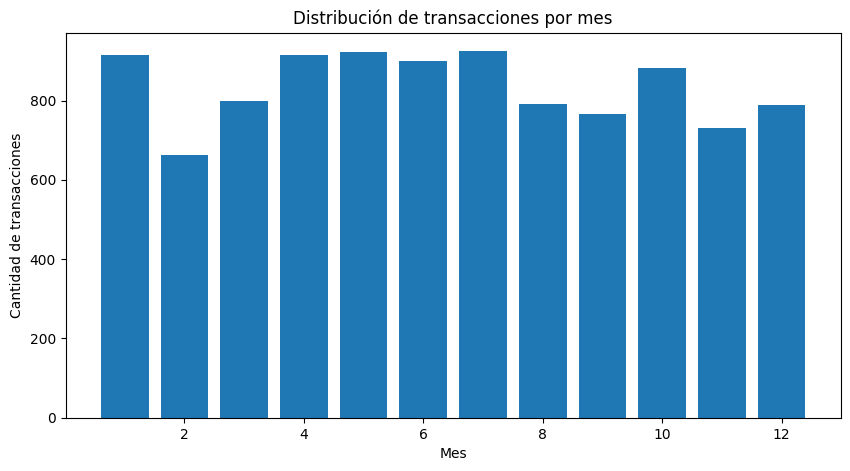

In [12]:
plt.figure(figsize=(10,5))
plt.bar(transacciones_mes['Mes'], transacciones_mes['Cantidad_transacciones'])
plt.title('Distribución de transacciones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de transacciones')
plt.show()


### 🧩 Interpretación del análisis temporal (por mes)

El volumen de transacciones se mantiene bastante estable durante todo el año, con ligeras variaciones entre meses.  
Los meses con menor actividad corresponden al **mes 2 (febrero)** y al **mes 9 (septiembre)**, mientras que los más activos son **abril, mayo y junio**.  

No se observan picos atípicos que indiquen estacionalidad fuerte o anomalías en los datos.  
Este patrón sugiere un comportamiento **constante del flujo de operaciones**, sin dependencia significativa de la época del año.


## Creo la tabla de transacciones por día

In [13]:
# Transacciones por día del mes
transacciones_dia = df.groupby('day')['transaction_id'].count().reset_index()
transacciones_dia.columns = ['Día', 'Cantidad_transacciones']
print(transacciones_dia.head())


   Día  Cantidad_transacciones
0    1                     372
1    2                     390
2    3                     253
3    4                     359
4    5                     391


## Visualización

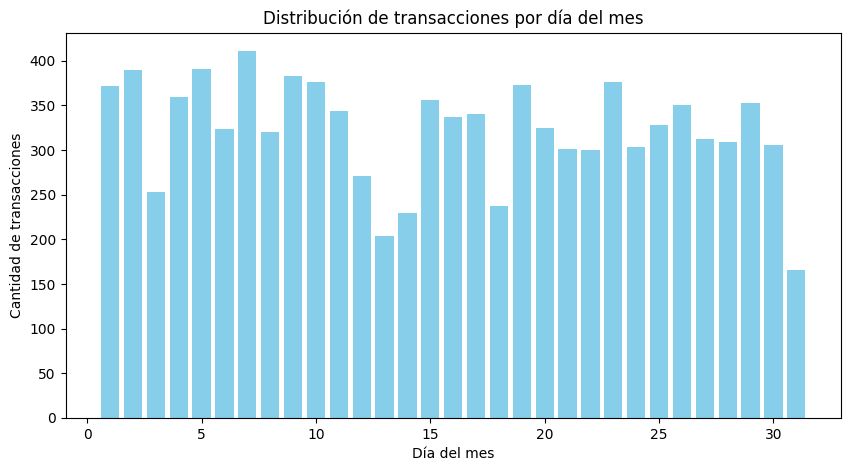

In [14]:
plt.figure(figsize=(10,5))
plt.bar(transacciones_dia['Día'], transacciones_dia['Cantidad_transacciones'], color='skyblue')
plt.title('Distribución de transacciones por día del mes')
plt.xlabel('Día del mes')
plt.ylabel('Cantidad de transacciones')
plt.show()


### 📅 Distribución de transacciones por día del mes

El volumen de transacciones se mantiene **estable a lo largo del mes**, sin concentraciones marcadas en fechas específicas.  
Se observan ligeras fluctuaciones naturales, con algunos picos aislados y una leve caída hacia los últimos días del mes.  

Este comportamiento indica que **las operaciones no dependen de un día concreto**,  
lo que sugiere un flujo constante de actividad en el sistema durante todo el periodo mensual.


## Creo tabla de transacciones por día de la semana

In [15]:
# Transacciones por día de la semana
transacciones_semana = df.groupby('weekday')['transaction_id'].count().reset_index()
transacciones_semana.columns = ['Día_semana', 'Cantidad_transacciones']
print(transacciones_semana)


  Día_semana  Cantidad_transacciones
0     Friday                    1163
1     Monday                    1595
2   Saturday                    1455
3     Sunday                    1449
4   Thursday                    1438
5    Tuesday                    1400
6  Wednesday                    1500


## Visualización

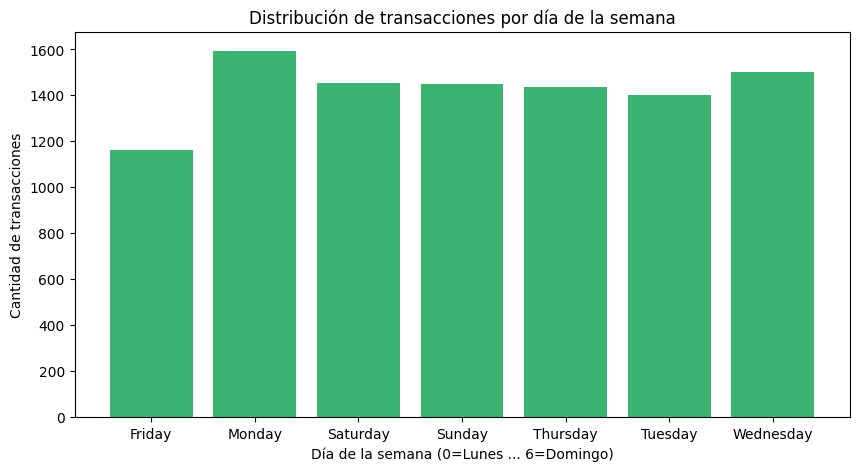

In [16]:
# Gráfico de barras por día de la semana
plt.figure(figsize=(10,5))
plt.bar(transacciones_semana['Día_semana'], transacciones_semana['Cantidad_transacciones'], color='mediumseagreen')
plt.title('Distribución de transacciones por día de la semana')
plt.xlabel('Día de la semana (0=Lunes ... 6=Domingo)')
plt.ylabel('Cantidad de transacciones')
plt.show()


### 🗓️ Distribución de transacciones por día de la semana

El análisis muestra un mayor volumen de transacciones durante los **días laborales**,  
especialmente al inicio de la semana (lunes y miércoles).  

Durante los **viernes y fines de semana** la actividad disminuye ligeramente,  
lo que sugiere que el comportamiento de los usuarios o clientes está influido por los **hábitos laborales**  
y una menor operativa durante los días de descanso.


## Creo tabla de transacciones por hora

### Corrijo la columna 'hour' a partir de 'transaction_hour'

In [17]:
df['hour'] = pd.to_datetime(df['transaction_hour'], errors='coerce').dt.hour


In [18]:
# Transacciones por hora del día
transacciones_hora = df.groupby('hour')['transaction_id'].count().reset_index()
transacciones_hora.columns = ['Hora', 'Cantidad_transacciones']
print(transacciones_hora.head())


   Hora  Cantidad_transacciones
0     0                     425
1     1                     417
2     2                     458
3     3                     405
4     4                     437


## Visualización

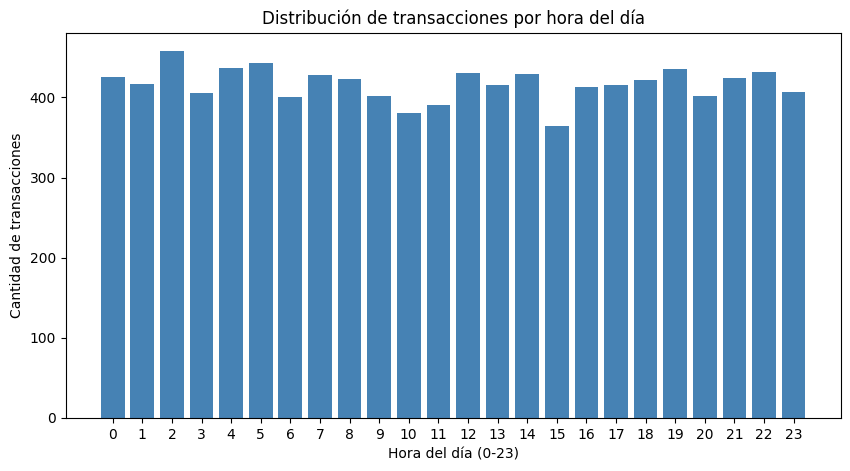

In [19]:
# Gráfico de barras de transacciones por hora del día
plt.figure(figsize=(10,5))
plt.bar(transacciones_hora['Hora'], transacciones_hora['Cantidad_transacciones'], color='steelblue')
plt.title('Distribución de transacciones por hora del día')
plt.xlabel('Hora del día (0-23)')
plt.ylabel('Cantidad de transacciones')
plt.xticks(range(0,24))
plt.show()


### 🕒 Análisis por hora del día

El gráfico muestra la **distribución de transacciones por hora del día**, tras corregir el formato de la variable `hour` a partir de `transaction_hour`.  
La actividad se mantiene bastante uniforme a lo largo del día, con ligeras variaciones horarias. No se observan picos extremos, lo que sugiere que las transacciones se realizan de manera constante en diferentes franjas horarias.

Esto puede indicar:

- Actividad continua a lo largo del día (por ejemplo, clientes de distintos husos horarios o transacciones automatizadas).  
- No existen horas críticas de riesgo concentrado, aunque podría ser interesante comparar esta distribución con las **transacciones fraudulentas** en un análisis posterior.


## 4. Análisis de correlación
### Identificar posibles relaciones entre variables numéricas (por ejemplo, entre amount, risk_score, customer_days_active, etc.)

In [20]:
# Selecciono solo las columnas numéricas
variables_numericas = df.select_dtypes(include=['int64', 'float64'])

# Calculo la matriz de correlación
matriz_correlacion = variables_numericas.corr()

# Muestro las primeras filas para revisar
matriz_correlacion.head()


,phone_clean,risk_score,customer_days_active,year,month,day,is_international,amount,card_bin6,card_last4,is_fraud
phone_clean,1.00,-0.02,0.02,-0.02,0.01,0.01,0.02,0.00,-0.01,0.00,0.01
risk_score,-0.02,1.00,0.02,-0.02,0.04,-0.01,-0.00,0.01,-0.01,-0.02,-0.01
customer_days_active,0.02,0.02,1.00,-0.18,0.23,-0.01,-0.02,-0.00,-0.01,0.01,-0.01
year,-0.02,-0.02,-0.18,1.00,-0.72,-0.10,-0.02,0.02,0.00,-0.02,0.00
month,0.01,0.04,0.23,-0.72,1.00,0.01,-0.02,-0.00,0.01,0.01,0.01


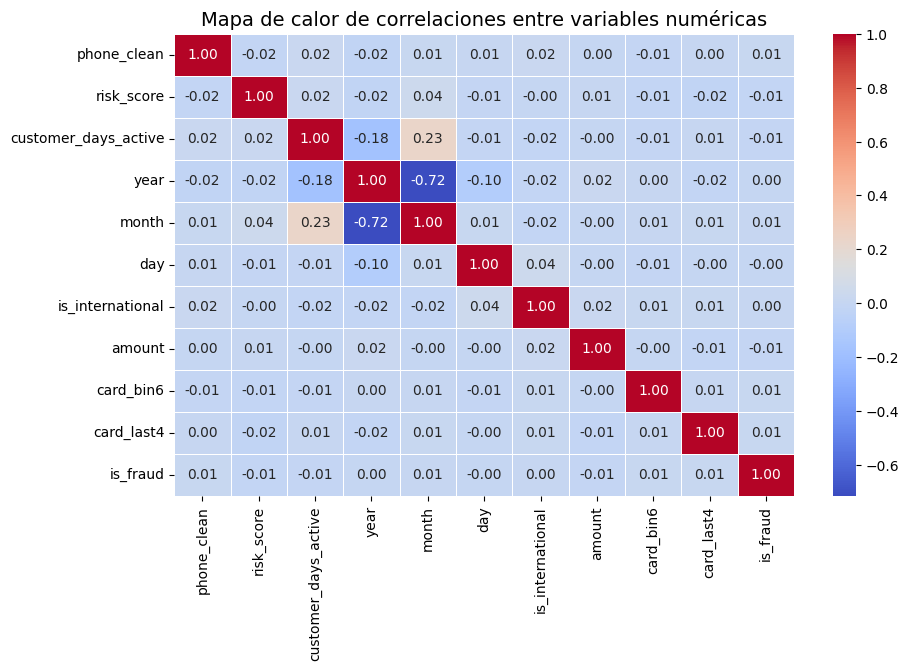

In [21]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 6))

# Mapa de calor de la matriz de correlación
sns.heatmap(
    matriz_correlacion, 
    annot=True,          # Mostrar los valores
    cmap='coolwarm',     # Escala de colores
    fmt=".2f",           # Formato de los valores
    linewidths=0.5
)

plt.title('Mapa de calor de correlaciones entre variables numéricas', fontsize=14)
plt.show()

### 🧩 Interpretación del análisis de correlación

El mapa de calor muestra la **relación lineal entre las variables numéricas** del dataset. Los valores de correlación oscilan entre **-1 y 1**:

- **1 o -1** indican una relación perfecta (positiva o negativa).  
- **0** indica ausencia de correlación lineal.

En este caso, se observan **correlaciones muy bajas**, lo que sugiere que las variables numéricas son **relativamente independientes entre sí**.  
Algunos puntos a destacar:

- Las variables **`year`** y **`month`** presentan una **correlación negativa fuerte (-0.72)**, esperable ya que ambas derivan del campo temporal y no aportan variabilidad real para el modelo.  
- **`customer_days_active`** muestra una correlación **moderadamente positiva con `month` (0.23)**, lo que puede indicar cierta relación temporal entre el tiempo de actividad del cliente y los meses del registro.  
- El resto de las variables (`risk_score`, `amount`, `is_international`, `is_fraud`, etc.) muestran **correlaciones cercanas a cero**, lo cual es positivo para evitar multicolinealidad si se emplean en un modelo predictivo.

📊 **Conclusión:**  
No se identifican relaciones lineales fuertes entre las variables numéricas principales, lo que indica que cada una aporta información distinta al análisis. Sin embargo, se recomienda revisar las variables derivadas del tiempo (`year`, `month`, `day`) para decidir si se mantienen o se transforman en indicadores más relevantes (por ejemplo, “temporada alta”, “fin de semana”, etc.).
